### Load Data

In [2]:
from keras.datasets import imdb

# Load the data, keeping only 10,000 of the most frequently occuring words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
max([max(sequence) for sequence in train_data])

9999

### Check a review

In [4]:
# Convert numbered review to actual review

word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Vectorize input data and labels

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))    # Creates an all zero matrix of shape (len(sequences),10K)
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1                        # Sets specific indices of results[i] to 1s
    return results

# Vectorize training Data
X_train = vectorize_sequences(train_data)

# Vectorize testing Data
X_test = vectorize_sequences(test_data)

In [6]:
print(train_labels.shape)
train_labels

(25000,)


array([1, 0, 0, ..., 0, 1, 0])

In [7]:
print(test_labels.shape)
test_labels

(25000,)


array([0, 1, 1, ..., 0, 0, 0])

### Distribution

12500


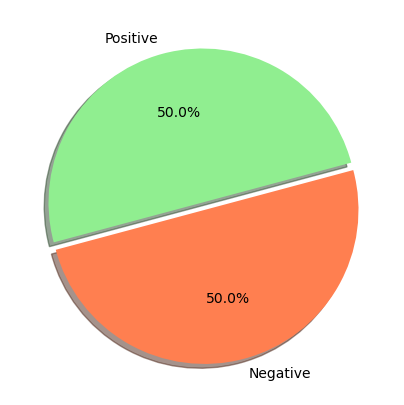

In [8]:
import numpy as np
import matplotlib.pyplot as plt
 
fig = plt.figure(figsize=(5,5))
colors = ["lightgreen",'coral']
pos = 0
neg = 0
for x in train_labels:
  if x==0:
      neg=neg+1
  else:
      pos=pos+1
ck=[]
ck.append(pos)
ck.append(neg)
piechart = plt.pie(ck,labels=["Positive","Negative"],
                 autopct ='%1.1f%%',
                 shadow = True,
                 colors = colors,
                 startangle = 15,
                 explode=(0, 0.05))
print(pos)

In [9]:
print(X_train.shape)
X_train

(25000, 10000)


array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [10]:
y_train = np.asarray(train_labels).astype('float32')
y_test  = np.asarray(test_labels).astype('float32')

In [11]:
print(y_test.shape)
y_test


(25000,)


array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [12]:
from keras import models
from keras import layers

In [13]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics

In [14]:
# Input for Validation
X_val = X_train[:5000]
partial_X_train = X_train[5000:]

# Labels for validation
y_val = y_train[:5000]
partial_y_train = y_train[5000:]

### Training Model

In [15]:
trainingLoss = {}
from tensorflow import keras
from optimizers.ADAM import ADAM
from optimizers.opts import AdaDelta, Momentum, AdaGrad

def trainDifOptimizer(optmzr):
    # torch.manual_seed(seed)
    model = models.Sequential()
    model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    optimizer = None
    if optmzr=='Adam_scratch':
      optimizer = getattr(optimizers,"Adam")(lr=0.01) 
    elif optmzr=='AdaDelta_scratch':
      optimizer = getattr(optimizers,"Adadelta")(lr=0.01)
    elif optmzr=='Momentum_scratch':
      optimizer = getattr(optimizers,"momentum")(lr=0.01)
    elif optmzr=='AdaGrad_scratch':
      optimizer = getattr(optimizers,"Adagrad")(lr=0.01)
    else:
      optimizer = getattr(optimizers, optmzr)(lr=0.01)
    
    model.compile(optimizer=optimizer,
              loss = losses.binary_crossentropy,
              metrics = [metrics.binary_accuracy])
    n_epochs = 15 

    trainLossForOptimizer = []
    print("\n-----------------------------------------\n")
    print("Optimizer : ", optmzr, "\n")
    history = model.fit(partial_X_train,
                partial_y_train,
                epochs=15,
                batch_size=100,
                validation_data=(X_val, y_val))

    trainingLoss[optmzr] = history.history['loss']
    print("\n-----------------------------------------\n")

optimizersLst = ['Adam_scratch','RMSprop','Adam', 'SGD','Adadelta','AdaGrad_scratch','AdaDelta_scratch',]
# optimizersLst = ['Adam_scratch','AdaGrad_scratch','AdaDelta_scratch','Momentum_scratch']
for optmzr in optimizersLst:
    trainDifOptimizer(optmzr)

print(trainingLoss)

2022-12-02 21:36:36.150398: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-12-02 21:36:36.150800: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB


-----------------------------------------

Optimizer :  Adam_scratch 

Epoch 1/15


2022-12-02 21:36:37.794188: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-12-02 21:36:38.656187: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


198/200 [============================>.] - ETA: 0s - loss: 0.3258 - binary_accuracy: 0.8586

2022-12-02 21:36:40.972938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 3s 12ms/step - loss: 0.3254 - binary_accuracy: 0.8588 - val_loss: 0.2777 - val_binary_accuracy: 0.8862
Epoch 2/15
200/200 [==============================] - 2s 10ms/step - loss: 0.1594 - binary_accuracy: 0.9363 - val_loss: 0.3263 - val_binary_accuracy: 0.8782
Epoch 3/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0994 - binary_accuracy: 0.9592 - val_loss: 0.4442 - val_binary_accuracy: 0.8738
Epoch 4/15
200/200 [==============================] - 2s 11ms/step - loss: 0.0645 - binary_accuracy: 0.9743 - val_loss: 0.5384 - val_binary_accuracy: 0.8682
Epoch 5/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0458 - binary_accuracy: 0.9830 - val_loss: 0.7122 - val_binary_accuracy: 0.8710
Epoch 6/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0290 - binary_accuracy: 0.9896 - val_loss: 0.8395 - val_binary_accuracy: 0.8708
Epoch 7/15
200/200 [==============================] - 2s 10ms/step - 

/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15


2022-12-02 21:37:10.283740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


197/200 [============================>.] - ETA: 0s - loss: 0.3627 - binary_accuracy: 0.8456

2022-12-02 21:37:12.639086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 3s 12ms/step - loss: 0.3615 - binary_accuracy: 0.8460 - val_loss: 0.2753 - val_binary_accuracy: 0.8914
Epoch 2/15
200/200 [==============================] - 2s 9ms/step - loss: 0.2016 - binary_accuracy: 0.9221 - val_loss: 0.2972 - val_binary_accuracy: 0.8890
Epoch 3/15
200/200 [==============================] - 2s 10ms/step - loss: 0.1425 - binary_accuracy: 0.9449 - val_loss: 0.3456 - val_binary_accuracy: 0.8794
Epoch 4/15
200/200 [==============================] - 2s 12ms/step - loss: 0.0966 - binary_accuracy: 0.9635 - val_loss: 0.4544 - val_binary_accuracy: 0.8782
Epoch 5/15
200/200 [==============================] - 2s 9ms/step - loss: 0.0637 - binary_accuracy: 0.9783 - val_loss: 0.5553 - val_binary_accuracy: 0.8816
Epoch 6/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0422 - binary_accuracy: 0.9849 - val_loss: 0.9625 - val_binary_accuracy: 0.8582
Epoch 7/15
200/200 [==============================] - 2s 11ms/step - lo

2022-12-02 21:37:41.496015: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


195/200 [============================>.] - ETA: 0s - loss: 0.3257 - binary_accuracy: 0.8610

2022-12-02 21:37:43.297341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 2s 10ms/step - loss: 0.3232 - binary_accuracy: 0.8624 - val_loss: 0.2731 - val_binary_accuracy: 0.8854
Epoch 2/15
200/200 [==============================] - 2s 8ms/step - loss: 0.1595 - binary_accuracy: 0.9352 - val_loss: 0.3238 - val_binary_accuracy: 0.8734
Epoch 3/15
200/200 [==============================] - 2s 8ms/step - loss: 0.0973 - binary_accuracy: 0.9593 - val_loss: 0.4260 - val_binary_accuracy: 0.8698
Epoch 4/15
200/200 [==============================] - 2s 8ms/step - loss: 0.0678 - binary_accuracy: 0.9714 - val_loss: 0.5004 - val_binary_accuracy: 0.8716
Epoch 5/15
200/200 [==============================] - 2s 8ms/step - loss: 0.0458 - binary_accuracy: 0.9816 - val_loss: 0.6438 - val_binary_accuracy: 0.8596
Epoch 6/15
200/200 [==============================] - 2s 9ms/step - loss: 0.0369 - binary_accuracy: 0.9863 - val_loss: 0.7109 - val_binary_accuracy: 0.8678
Epoch 7/15
200/200 [==============================] - 2s 9ms/step - loss: 

/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
  8/200 [>.............................] - ETA: 1s - loss: 0.6933 - binary_accuracy: 0.4825 

2022-12-02 21:38:07.496046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - ETA: 0s - loss: 0.6854 - binary_accuracy: 0.5636

2022-12-02 21:38:09.251192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 2s 10ms/step - loss: 0.6854 - binary_accuracy: 0.5636 - val_loss: 0.6675 - val_binary_accuracy: 0.6676
Epoch 2/15
200/200 [==============================] - 2s 8ms/step - loss: 0.6282 - binary_accuracy: 0.7366 - val_loss: 0.5873 - val_binary_accuracy: 0.7684
Epoch 3/15
200/200 [==============================] - 2s 8ms/step - loss: 0.5303 - binary_accuracy: 0.8078 - val_loss: 0.4872 - val_binary_accuracy: 0.8086
Epoch 4/15
200/200 [==============================] - 1s 7ms/step - loss: 0.4359 - binary_accuracy: 0.8356 - val_loss: 0.4125 - val_binary_accuracy: 0.8296
Epoch 5/15
200/200 [==============================] - 1s 7ms/step - loss: 0.3738 - binary_accuracy: 0.8549 - val_loss: 0.3699 - val_binary_accuracy: 0.8462
Epoch 6/15
200/200 [==============================] - 1s 7ms/step - loss: 0.3354 - binary_accuracy: 0.8671 - val_loss: 0.3447 - val_binary_accuracy: 0.8532
Epoch 7/15
200/200 [==============================] - 2s 8ms/step - loss: 

/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adadelta.py:79: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
  7/200 [>.............................] - ETA: 1s - loss: 0.6920 - binary_accuracy: 0.5429 

2022-12-02 21:38:32.463823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


198/200 [============================>.] - ETA: 0s - loss: 0.6909 - binary_accuracy: 0.5431

2022-12-02 21:38:34.218022: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 2s 10ms/step - loss: 0.6909 - binary_accuracy: 0.5432 - val_loss: 0.6890 - val_binary_accuracy: 0.5610
Epoch 2/15
200/200 [==============================] - 2s 8ms/step - loss: 0.6843 - binary_accuracy: 0.6074 - val_loss: 0.6811 - val_binary_accuracy: 0.6188
Epoch 3/15
200/200 [==============================] - 2s 8ms/step - loss: 0.6721 - binary_accuracy: 0.6654 - val_loss: 0.6660 - val_binary_accuracy: 0.6798
Epoch 4/15
200/200 [==============================] - 2s 8ms/step - loss: 0.6516 - binary_accuracy: 0.7175 - val_loss: 0.6437 - val_binary_accuracy: 0.7194
Epoch 5/15
200/200 [==============================] - 2s 8ms/step - loss: 0.6253 - binary_accuracy: 0.7558 - val_loss: 0.6166 - val_binary_accuracy: 0.7584
Epoch 6/15
200/200 [==============================] - 2s 8ms/step - loss: 0.5965 - binary_accuracy: 0.7905 - val_loss: 0.5886 - val_binary_accuracy: 0.7798
Epoch 7/15
200/200 [==============================] - 2s 8ms/step - loss: 

/Users/priyanshul/miniconda/envs/SMAI/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adagrad.py:81: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/15
  8/200 [>.............................] - ETA: 1s - loss: 0.6952 - binary_accuracy: 0.5062  

2022-12-02 21:38:57.958364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


194/200 [============================>.] - ETA: 0s - loss: 0.6083 - binary_accuracy: 0.6995

2022-12-02 21:38:59.743055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 2s 10ms/step - loss: 0.6041 - binary_accuracy: 0.7031 - val_loss: 0.4718 - val_binary_accuracy: 0.8170
Epoch 2/15
200/200 [==============================] - 2s 8ms/step - loss: 0.3884 - binary_accuracy: 0.8492 - val_loss: 0.3520 - val_binary_accuracy: 0.8608
Epoch 3/15
200/200 [==============================] - 2s 8ms/step - loss: 0.3063 - binary_accuracy: 0.8786 - val_loss: 0.3153 - val_binary_accuracy: 0.8762
Epoch 4/15
200/200 [==============================] - 2s 8ms/step - loss: 0.2664 - binary_accuracy: 0.8971 - val_loss: 0.3023 - val_binary_accuracy: 0.8784
Epoch 5/15
200/200 [==============================] - 2s 8ms/step - loss: 0.2397 - binary_accuracy: 0.9094 - val_loss: 0.2946 - val_binary_accuracy: 0.8830
Epoch 6/15
200/200 [==============================] - 2s 8ms/step - loss: 0.2202 - binary_accuracy: 0.9173 - val_loss: 0.2895 - val_binary_accuracy: 0.8846
Epoch 7/15
200/200 [==============================] - 2s 8ms/step - loss: 

2022-12-02 21:39:25.199354: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


193/200 [===========================>..] - ETA: 0s - loss: 0.6885 - binary_accuracy: 0.5139

2022-12-02 21:39:27.383072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 3s 12ms/step - loss: 0.6885 - binary_accuracy: 0.5141 - val_loss: 0.6849 - val_binary_accuracy: 0.5114
Epoch 2/15
200/200 [==============================] - 2s 8ms/step - loss: 0.6757 - binary_accuracy: 0.5344 - val_loss: 0.6711 - val_binary_accuracy: 0.5346
Epoch 3/15
200/200 [==============================] - 2s 9ms/step - loss: 0.6576 - binary_accuracy: 0.5766 - val_loss: 0.6513 - val_binary_accuracy: 0.6074
Epoch 4/15
200/200 [==============================] - 2s 9ms/step - loss: 0.6349 - binary_accuracy: 0.6480 - val_loss: 0.6286 - val_binary_accuracy: 0.6652
Epoch 5/15
200/200 [==============================] - 2s 9ms/step - loss: 0.6104 - binary_accuracy: 0.7060 - val_loss: 0.6053 - val_binary_accuracy: 0.7244
Epoch 6/15
200/200 [==============================] - 2s 9ms/step - loss: 0.5861 - binary_accuracy: 0.7543 - val_loss: 0.5825 - val_binary_accuracy: 0.7550
Epoch 7/15
200/200 [==============================] - 2s 9ms/step - loss: 

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

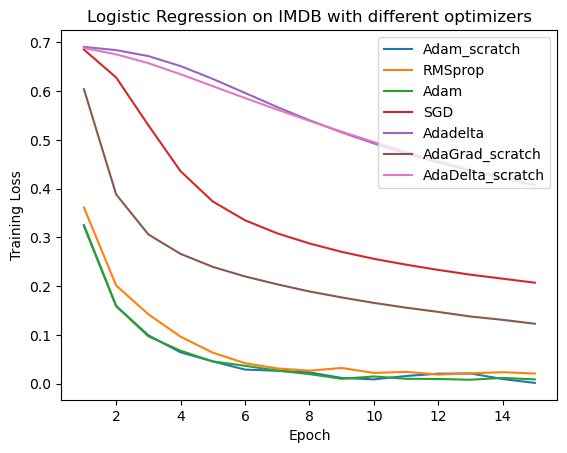

In [17]:
# Plotting losses
Xval = np.arange(1, 16)

plt.xlabel("Epoch")  # add X-axis label
plt.ylabel("Training Loss")  # add Y-axis label
plt.title("Logistic Regression on IMDB with different optimizers")  # add title

for key, value in trainingLoss.items():
    plt.plot(Xval, value, label=key)

plt.legend()
# plt.show()
plt.savefig('LR_imdb.png')

### Accuracy and Result

In [18]:
# Making Predictions for testing data

model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer="Adam",
          loss = losses.binary_crossentropy,
            metrics = [metrics.binary_accuracy])

history = model.fit(partial_X_train,
            partial_y_train,
            epochs=15,
            batch_size=100,
            validation_data=(X_val, y_val))


np.set_printoptions(suppress=True)
result = model.predict(X_test)

Epoch 1/15
  1/200 [..............................] - ETA: 1:05 - loss: 0.6960 - binary_accuracy: 0.4500

2022-12-02 21:39:53.513247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


196/200 [============================>.] - ETA: 0s - loss: 0.3823 - binary_accuracy: 0.8462

2022-12-02 21:39:55.660450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


200/200 [==============================] - 3s 12ms/step - loss: 0.3800 - binary_accuracy: 0.8471 - val_loss: 0.2726 - val_binary_accuracy: 0.8942
Epoch 2/15
200/200 [==============================] - 2s 11ms/step - loss: 0.1916 - binary_accuracy: 0.9295 - val_loss: 0.2975 - val_binary_accuracy: 0.8836
Epoch 3/15
200/200 [==============================] - 2s 11ms/step - loss: 0.1335 - binary_accuracy: 0.9519 - val_loss: 0.3305 - val_binary_accuracy: 0.8852
Epoch 4/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0960 - binary_accuracy: 0.9678 - val_loss: 0.3963 - val_binary_accuracy: 0.8782
Epoch 5/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0670 - binary_accuracy: 0.9776 - val_loss: 0.4601 - val_binary_accuracy: 0.8710
Epoch 6/15
200/200 [==============================] - 2s 10ms/step - loss: 0.0426 - binary_accuracy: 0.9876 - val_loss: 0.5359 - val_binary_accuracy: 0.8688
Epoch 7/15
200/200 [==============================] - 2s 10ms/step - 

2022-12-02 21:40:26.429077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 3s 4ms/step


In [19]:
result

array([[0.0008232 ],
       [1.        ],
       [0.08086787],
       ...,
       [0.00028688],
       [0.00015205],
       [0.9986589 ]], dtype=float32)

In [20]:
y_pred = np.zeros(len(result))
for i, score in enumerate(result):
    y_pred[i] = 1 if score > 0.5 else 0

In [21]:
from sklearn.metrics import mean_absolute_error,accuracy_score
print("Mean Absolute Error :", mean_absolute_error(y_pred, y_test))
print("Accuracy :",100*(accuracy_score(y_test, y_pred)))

Mean Absolute Error : 0.14776
Accuracy : 85.224
